In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [3]:
iris_data = load_iris()
iris_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
iris_data['DESCR'][:177]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 nume'

In [5]:
iris_data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
iris_data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
iris_df = pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


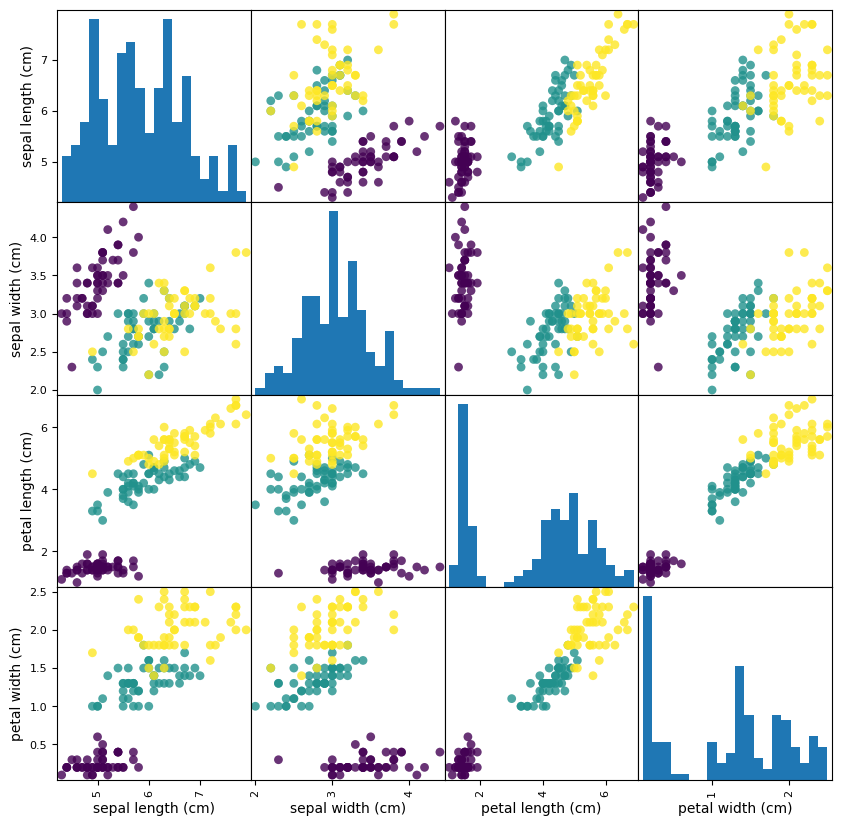

In [8]:
pairplot = pd.plotting.scatter_matrix(iris_df, c=iris_data['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

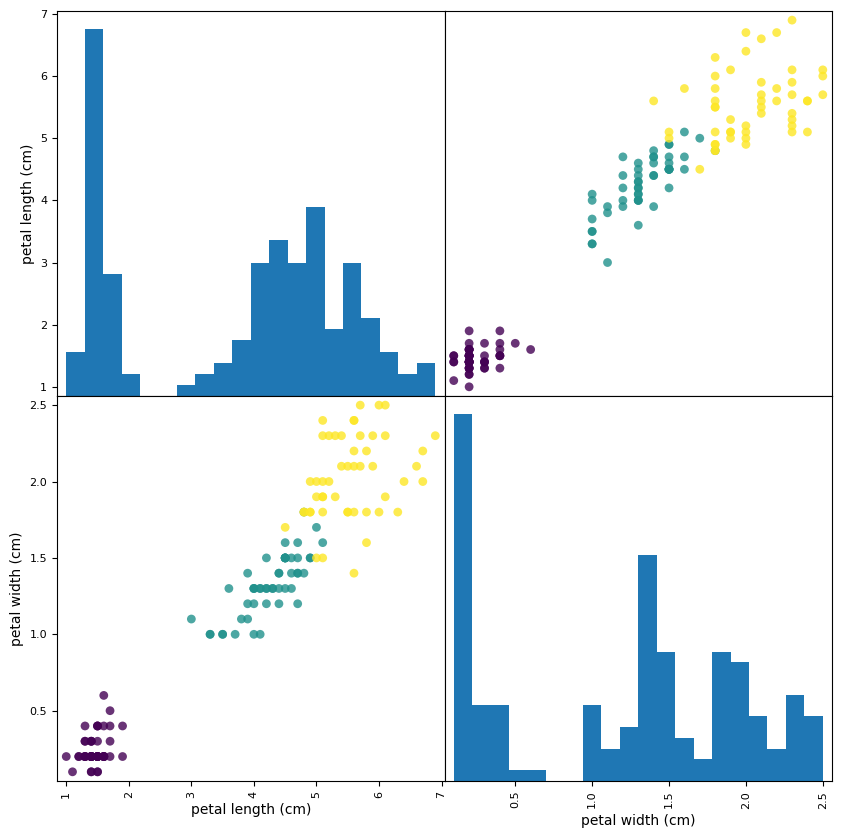

In [9]:
iris_df_simple = pd.DataFrame(iris_data.data[:, 2:4], columns=iris_data.feature_names[2:4])
pairplot = pd.plotting.scatter_matrix(iris_df_simple, c=iris_data['target'], figsize=(10, 10), marker='o',
                                       hist_kwds={'bins': 20}, s=40, alpha=.8)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(iris_data.data[:, 2:4],
                                                    iris_data['target'],
                                                    random_state=4)

X_train_concat = np.concatenate((X_train, y_train.reshape(-1, 1)), axis=1)
X_test_concat = np.concatenate((X_test, y_test.reshape(-1, 1)), axis=1)
X_train_df = pd.DataFrame(X_train_concat)
X_train_df.head()

,0,1,2
0,4.7,1.5,1.0
1,1.6,0.2,0.0
2,6.1,2.3,2.0
3,1.5,0.2,0.0
4,4.4,1.4,1.0


In [20]:
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train, y_train)
knn_predictions = knn.predict(X_test)

accuracy = accuracy_score(y_test, knn_predictions)

print(accuracy)

0.9736842105263158
